In [ ]:
from app.inform.system import files_uploaded

PRODUCT = 'Blanco'
FILES = ['./upload/1.jpg', './upload/2.jpg', './upload/3.jpg', './upload/4.jpg']

files_uploaded(FILES, PRODUCT)


Systemnachricht:
4 Unterlagen hochgeladen für Beantragung eines Blanco Darlehens.


In [11]:
from app.extract.document import text_detection
from app.inform.system import documents_extracted

documents = [text_detection(file) for file in FILES]
documents_extracted(documents)


Systemnachricht:
4 Unterlagen eingelesen und Inhalte erkannt.


In [12]:
from app.decide.document import all_documents, map_to_application
from app.inform.applicant import missing_documents
from app.inform.system import complete_documents

application = map_to_application(documents, PRODUCT)

if all_documents(application):
    complete_documents(application, PRODUCT)
else:
    missing_documents(application)


Systemnachricht:
Für Blanco Darlehen geforderten 4 Unterlagen hochgeladen.


Systemnachticht:
Unterlage Selbstauskunft


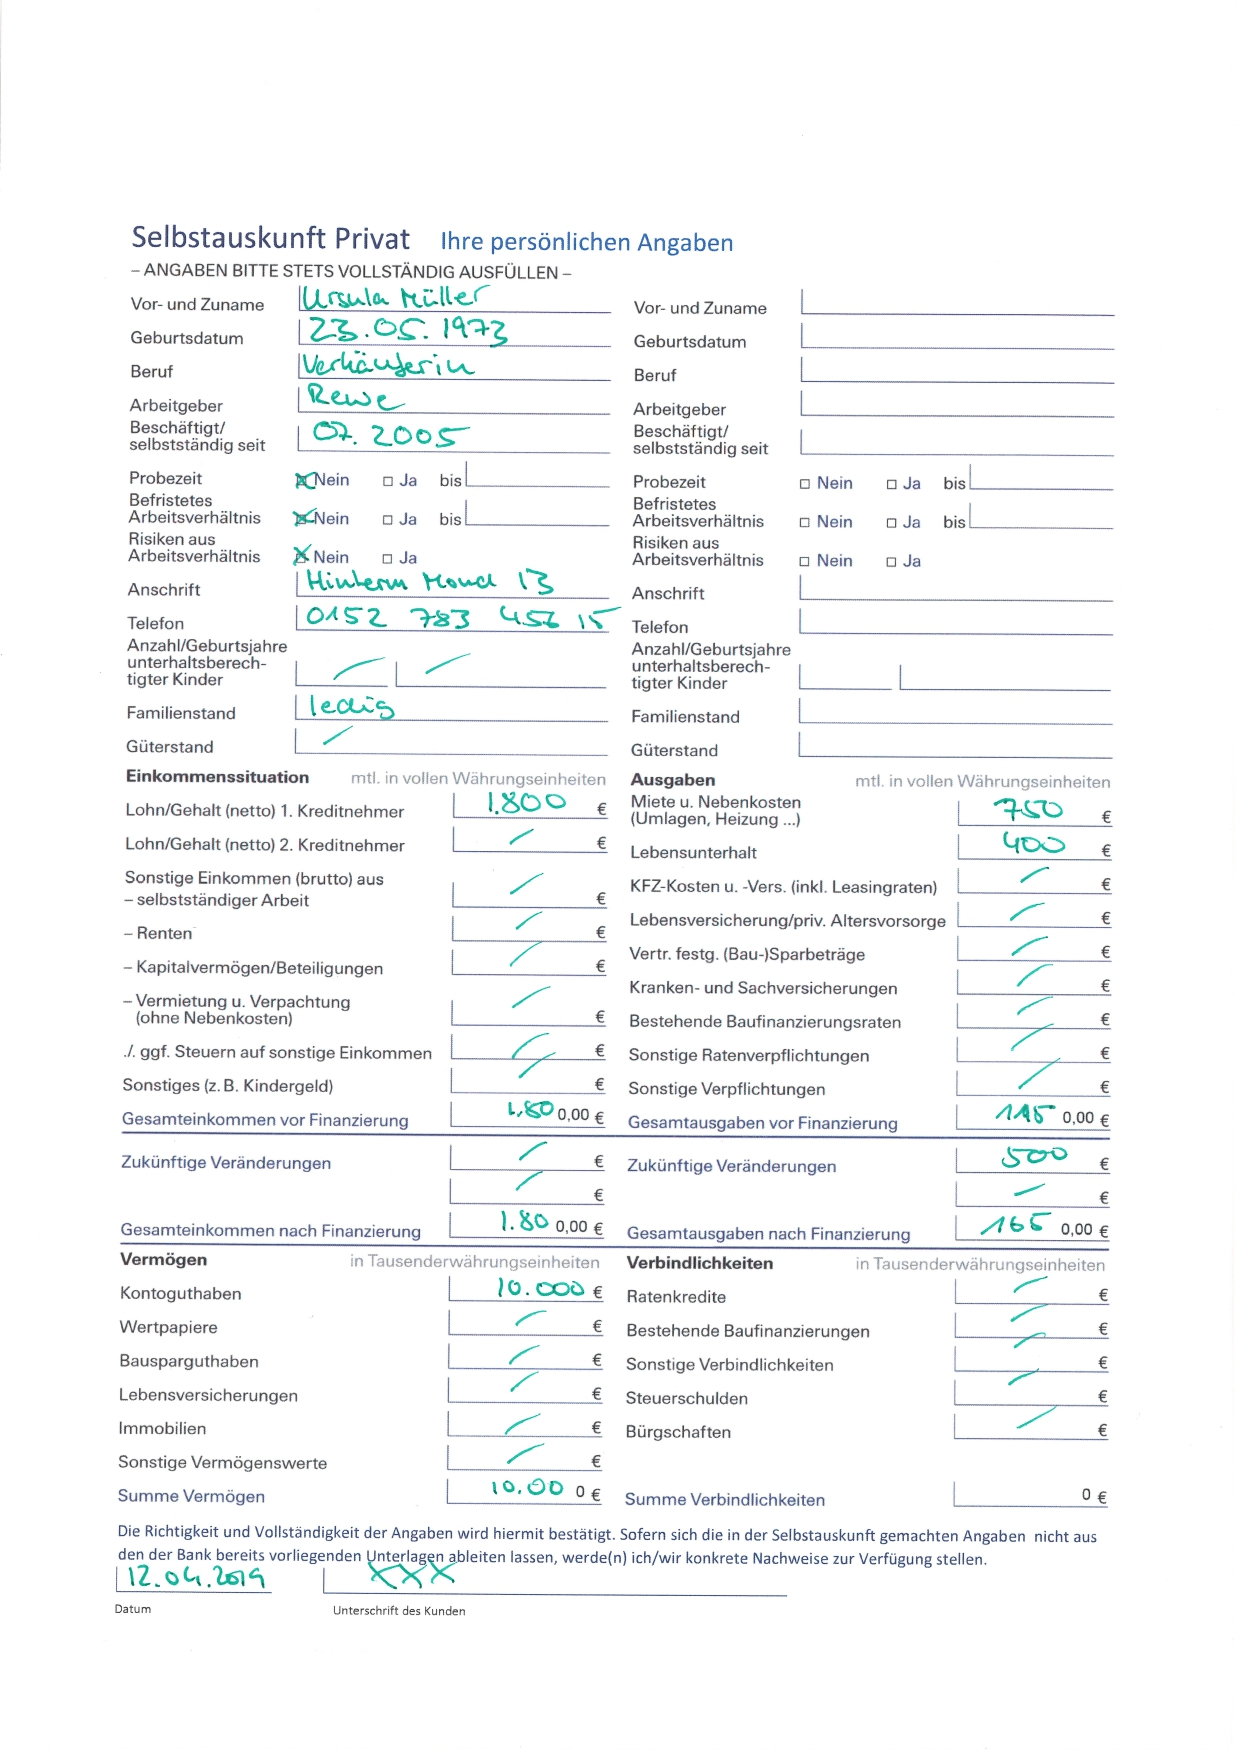

Unterlage Gehaltsnachweis


In [15]:
from app.inform.applicant import show_documents

show_documents(application, FILES)

In [16]:
from importlib import import_module

from app.inform.system import information_extracted

def func(name: str):
    module = import_module('app.extract.information')
    return getattr(module, name)

information = {
    name: func(name.lower())(document['Content']) for name, document in application.items()
}

information_extracted(information)


Systemnachricht:
Relevante Informationen aus den 4 Unterlagen extrahiert.


In [17]:
from app.decide.document import all_information
from app.inform.applicant import missing_information
from app.inform.system import complete_information

complete = all(all_information(document) for _, document in information.items())

if complete:
    complete_information(information)
else:
    missing_information(information)


Systemnachricht:
Notwendige Felder sind in den 4 Unterlagen ausgefüllt.


In [18]:
from app.decide.information import plausible_person, plausible_gehaltsnachweis
from app.inform.applicant import unplausible_information

mismatches = {
    'Person': plausible_person(information), 
    'Gehaltsnachweis': plausible_gehaltsnachweis(information)
}

if any(len(mismatch) > 0 for _, mismatch in mismatches.items()):
    unplausible_information(information, mismatches)



    Liebe Ursula Müller,

    leider ergeben sich Unstimmigkeiten zwischen Deinen eingereichten Unterlagen.

    Bitte überprüfe folgende Information(en):

    Informationen:
    	Person:
		- Name
		- Anschrift
		- Geburtsdatum
	Gehaltsnachweis:
		- Jahr

    Freundliche Grüße    
    Die Bausparkasse Schwäbisch Hall
    
